In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW1


---
__Name:__  Jim Chen   
__Class:__ MIDS w261 Fall 2016 Group 2  
__Email:__  jim.chen@iSchool.Berkeley.edu    
__Week:__   1

__Due Time:__ HW is due the Tuesday of the following week by 8AM (West coast time). I.e., Tuesday, Sept 6, 2016 in the case of this homework. 


# Table of Contents <a name="TOC"></a> 

1.  [HW Intructions](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW  Problems](#3)   
    1.0.  [HW1.0](#1.0)   
    1.0.  [HW1.1](#1.1)   
    1.2.  [HW1.2](#1.2)   
    1.3.  [HW1.3](#1.3)    
    1.4.  [HW1.4](#1.4)    
    1.5.  [HW1.5](#1.5)    
   


<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)

MIDS UC Berkeley, Machine Learning at Scale
DATSCIW261 ASSIGNMENT #1

Version 2016-09-2 

 === INSTRUCTIONS for SUBMISSIONS ===
Follow the instructions for submissions carefully.

https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form 


### IMPORTANT

HW1 can be completed locally on your computer
### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* See lecture 1

<a name="3">
# HW Problems
[Back to Table of Contents](#TOC)

## 3.  HW1.0  <a name="1.0"></a>
[Back to Table of Contents](#TOC)

### HW1.0.1.  Self-Introduction
W1.0.0 Prepare your bio and include it in this HW submission. Please limit to 100 words. Count the words in your bio and print the length of your bio (in terms of words) in a separate cell.

Fill in the following information [Optional]
* Your Location 
* When did you start MIDS  and what is your target finish date
* What you want to get out of w261?

In [3]:
bio = '''Location: Memphis, Tennessee
MIDS: Started in Fall 2015; expected to finish after Spring 2017
W261 Goal: I wanted to be able to apply machine learning to large datasets and become more familiar with machine learning in general. I am glad this course covers machine learning projects in detailed, methodical steps. I am a little disappointed this course will not be covering neural network. 
'''
print(bio)
print(len(bio.split()))

Location: Memphis, Tennessee
MIDS: Started in Fall 2015; expected to finish after Spring 2017
W261 Goal: I wanted to be able to apply machine learning to large datasets and become more familiar with machine learning in general. I am glad this course covers machine learning projects in detailed, methodical steps. I am a little disappointed this course will not be covering neural network. 

63


### HW1.0.2. Big data
Define big data. Provide an example of a big data problem in your domain of expertise. 

Big data is some combination of 4 V's: volume, velocity, variety and veracity.  
- volume: the data size is in the realm of TBs or above  
- velocity: the data is read and written constantly
- variety: the data can contain many different formats, text, csv, binary, etc.
- veracity: the data may not be clean and may have incorrect/missing values

In my field of large scale courier service, predicting delayed messages (real time) would be an example

### HW1.0.3.  Bias Variance
What is  bias-variance decomposition in the context machine learning? How is it used in machine learning? 

Bias-variance decomposition is breaking down error into bias (how model prediction differ from true value of training data), variance (how prediction of one training set differ from expected predicted value of over all training sets) and irreducible error (inherent noise in the data).  
In machine learning, the goal is to find the sweetspot of complexity such that the combination of bias and variance is at the minimum.

## 3.  HW1.1 WordCount using a single thread  <a name="1.1"></a>
[Back to Table of Contents](#TOC)

Write a program called alice_words.py that creates a text file named __alice_words.txt__ containing an alphabetical listing of all the words, and the number of times each occurs, in the text version of Alice’s Adventures in Wonderland. (You can obtain a free plain text version of the book, along with many others, from [here](http://www.gutenberg.org/cache/epub/11/pg11.txt) The first 10 lines of your output file should look something like this (the counts are not totally precise):

In [15]:
# check where is the current directory and change if necessary using something like: %cd W261MasterDir
!pwd

/share/W261/HW1


In [13]:
#let's organize our homeworks into subfolders by week at least (and possibly by problem)
!mkdir HW1

In [6]:
# notice the use of % in the following magic command
%cd HW1

/share/W261/HW1


In [44]:
!curl 'http://www.gutenberg.org/cache/epub/11/pg11.txt' -o alicesTextFilename.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  163k  100  163k    0     0   331k      0 --:--:-- --:--:-- --:--:--  346k


In [45]:
#display the first few lines
!head alicesTextFilename.txt

In [18]:
#example of a regular expression to detect words in a string. 
import re
line = """ 0017.2000-01-17.beck	0	 global risk management operations	" congratulations, sally!!!  kk  ----------------------forwarded by kathy kokas/corp/enron on 01/17/2000  08:08 pm---------------------------  from: rick causey 01/17/2000 06:04 pm  sent by: enron announcements  to: all enron worldwide  cc:  subject: global risk management operations  recognizing enron , s increasing worldwide presence in the wholesale energy  business and the need to insure outstanding internal controls for all of our  risk management activities, regardless of location, a global risk management  operations function has been created under the direction of sally w. beck,  vice president. in this role, sally will report to rick causey, executive  vice president and chief accounting officer.  sally , s responsibilities with regard to global risk management operations  will mirror those of other recently created enron global functions. in this  role, sally will work closely with all enron geographic regions and wholesale  companies to insure that each entity receives individualized regional support  while also focusing on the following global responsibilities:  1. enhance communication among risk management operations professionals.  2. assure the proliferation of best operational practices around the globe.  3. facilitate the allocation of human resources.  4. provide training for risk management operations personnel.  5. coordinate user requirements for shared operational systems.  6. oversee the creation of a global internal control audit plan for risk  management activities.  7. establish procedures for opening new risk management operations offices  and create key benchmarks for measuring on-going risk controls.  each regional operations team will continue its direct reporting relationship  within its business unit, and will collaborate with sally in the delivery of  these critical items. the houston-based risk management operations team under  sue frusco , s leadership, which currently supports risk management activities  for south america and australia, will also report directly to sally.  sally retains her role as vice president of energy operations for enron  north america, reporting to the ena office of the chairman. she has been in  her current role over energy operations since 1997, where she manages risk  consolidation and reporting, risk management administration, physical product  delivery, confirmations and cash management for ena , s physical commodity  trading, energy derivatives trading and financial products trading.  sally has been with enron since 1992, when she joined the company as a  manager in global credit. prior to joining enron, sally had four years  experience as a commercial banker and spent seven years as a registered  securities principal with a regional investment banking firm. she also owned  and managed a retail business for several years.  please join me in supporting sally in this additional coordination role for  global risk management operations."""
re.findall(r'[a-z]+', line.lower()) [0:10]

['beck',
 'global',
 'risk',
 'management',
 'operations',
 'congratulations',
 'sally',
 'kk',
 'forwarded',
 'by']

### Dictionaries are a good way to keep track of word counts

wordCounts={} 

### defaultdict are slightly more effectice way of doing word counting
 One way to do word counting but not best. A defaultdict is like a regular dictionary, except that when you try to look up a key it doesn’t contain, it first adds a value for it using a zero-argument function you provided
when you created it. In order to use defaultdicts, you have to import them

In [19]:
# Here is an example of wordcounting with a defaultdict (dictionary structure with a nice 
# default behaviours when a key does not exist in the dictionary
import re
from collections import defaultdict

line = """ 0017.2000-01-17.beck	0	 global risk management operations	" congratulations, sally!!!  kk  ----------------------forwarded by kathy kokas/corp/enron on 01/17/2000  08:08 pm---------------------------  from: rick causey 01/17/2000 06:04 pm  sent by: enron announcements  to: all enron worldwide  cc:  subject: global risk management operations  recognizing enron , s increasing worldwide presence in the wholesale energy  business and the need to insure outstanding internal controls for all of our  risk management activities, regardless of location, a global risk management  operations function has been created under the direction of sally w. beck,  vice president. in this role, sally will report to rick causey, executive  vice president and chief accounting officer.  sally , s responsibilities with regard to global risk management operations  will mirror those of other recently created enron global functions. in this  role, sally will work closely with all enron geographic regions and wholesale  companies to insure that each entity receives individualized regional support  while also focusing on the following global responsibilities:  1. enhance communication among risk management operations professionals.  2. assure the proliferation of best operational practices around the globe.  3. facilitate the allocation of human resources.  4. provide training for risk management operations personnel.  5. coordinate user requirements for shared operational systems.  6. oversee the creation of a global internal control audit plan for risk  management activities.  7. establish procedures for opening new risk management operations offices  and create key benchmarks for measuring on-going risk controls.  each regional operations team will continue its direct reporting relationship  within its business unit, and will collaborate with sally in the delivery of  these critical items. the houston-based risk management operations team under  sue frusco , s leadership, which currently supports risk management activities  for south america and australia, will also report directly to sally.  sally retains her role as vice president of energy operations for enron  north america, reporting to the ena office of the chairman. she has been in  her current role over energy operations since 1997, where she manages risk  consolidation and reporting, risk management administration, physical product  delivery, confirmations and cash management for ena , s physical commodity  trading, energy derivatives trading and financial products trading.  sally has been with enron since 1992, when she joined the company as a  manager in global credit. prior to joining enron, sally had four years  experience as a commercial banker and spent seven years as a registered  securities principal with a regional investment banking firm. she also owned  and managed a retail business for several years.  please join me in supporting sally in this additional coordination role for  global risk management operations."""
wordCounts=defaultdict(int)
for word in re.findall(r'[a-z]+', line.lower()):
    #if word in ["a"]:
        #print word,"\n"
    wordCounts[word] += 1
for key in sorted(wordCounts)[0:10]:
    print (key, wordCounts[key])


('a', 7)
('accounting', 1)
('activities', 3)
('additional', 1)
('administration', 1)
('all', 3)
('allocation', 1)
('also', 3)
('america', 2)
('among', 1)


### HW1.1.1 How many times does the word alice occur in the book?

In [7]:
%%writefile alice_words.py
#!/bin/bash
import re
from collections import defaultdict
wordCounts = defaultdict(int)
with open('alicesTextFilename.txt', 'r') as aliceFile:
    for line in aliceFile:
        for word in re.findall(r'[a-z]+', line.lower()):
            wordCounts[word] += 1

print ('alice occured ' + str(wordCounts['alice']) + ' times in the book')

Overwriting alice_words.py


In [8]:
!chmod a+x alice_words.py
!python ./alice_words.py

alice occured 403 times in the book


## 3.  HW1.2 Command Line Map Reduce Framework  <a name="1.2"></a>
[Back to Table of Contents](#TOC)

Read through the provided mapreduce shell script (pWordCount.sh) provided below
   and all of its comments. When you are comfortable with their
   purpose and function, respond to the remaining homework questions below. 
   Run the shell without any arguments.

In [9]:
%%writefile pWordCount.sh
#!/bin/bash
## pWordCount.sh
## Author: James G. Shanahan
## Usage: pWordCount.sh m wordlist testFile.txt
## Input:
##       m = number of processes (maps), e.g., 4
##       wordlist = a space-separated list of words in quotes, e.g., "the and of"
##       inputFile = a text input file
##
## Instructions: Read this script and its comments closely.
##               Do your best to understand the purpose of each command,
##               and focus on how arguments are supplied to mapper.py/reducer.py,
##               as this will determine how the python scripts take input.
##               When you are comfortable with the unix code below,
##               answer the questions on the LMS for HW1 about the starter code.


usage()
{
    echo ERROR: No arguments supplied
    echo
    echo To run use
    echo "     pWordCount.sh m wordlist inputFile"
    echo Input:
    echo "      number of processes/maps, EG, 4"
    echo "      wordlist = a space-separated list of words in quotes, e.g., 'the and of'"
    echo "      inputFile = a text input file"
}

if [ $# -eq 0 ]
  then
    usage  
    exit 1
fi
    
## collect user input
m=$1 ## the number of parallel processes (maps) to run

wordlist=$2 ## if set to "*", then all words are used

## a text file 
data=$3

## 'wc' determines the number of lines in the data
## 'perl -pe' regex strips the piped wc output to a number
linesindata=`wc -l $data | perl -pe 's/^.*?(\d+).*?$/$1/'`

## determine the lines per chunk for the desired number of processes
linesinchunk=`echo "$linesindata/$m+1" | bc`

## split the original file into chunks by line
split -l $linesinchunk $data $data.chunk.

## assign python mappers (mapper.py) to the chunks of data
## and emit their output to temporary files
for datachunk in $data.chunk.*; do
    ## feed word list to the python mapper here and redirect STDOUT to a temporary file on disk
    ####
    ####
    ./mapper.py  "$wordlist" <$datachunk > $datachunk.counts &
    ####
    ####
done
## wait for the mappers to finish their work
wait
    
###----------------------------------------------------------------------------------------
#TODO 
#Insert a sort -k1,1 here to collate wordCount records with the same key (i.e., same word)
#
###----------------------------------------------------------------------------------------

    
## 'ls' makes a list of the temporary count files
## 'perl -pe' regex replaces line breaks with spaces
countfiles=`\ls $data.chunk.*.counts | perl -pe 's/\n/ /'`

## feed the list of countfiles to the python reducer and redirect STDOUT to disk
####
####
    
\sort -k1,1 -m $countfiles | ./reducer.py 
####
####

## clean up the data chunks and temporary count files
\rm $data.chunk.*

Overwriting pWordCount.sh


In [10]:
!head pWordCount.sh

#!/bin/bash
## pWordCount.sh
## Author: James G. Shanahan
## Usage: pWordCount.sh m wordlist testFile.txt
## Input:
##       m = number of processes (maps), e.g., 4
##       wordlist = a space-separated list of words in quotes, e.g., "the and of"
##       inputFile = a text input file
##
## Instructions: Read this script and its comments closely.


In [11]:
# Change the execution priviledges to make the shell script executable by all
!chmod a+x pWordCount.sh

In [12]:
!chmod a+x pWordCount.sh
! ./pWordCount.sh

ERROR: No arguments supplied

To run use
     pWordCount.sh m wordlist inputFile
Input:
      number of processes/maps, EG, 4
      wordlist = a space-separated list of words in quotes, e.g., 'the and of'
      inputFile = a text input file


### Please feel free to adopt and modify the following mapper  for your purpose¶

In [14]:
%%writefile mapper.py
#!/usr/bin/python
#this covers both 1.2 and 1.3 (specific word count and generic word count that includes all words)

import sys
import re
from collections import defaultdict

findword = sys.argv[1]
wordlist = sorted(findword.lower().split())
wordCounts = defaultdict(int)

if findword == '*':
    for line in sys.stdin:
        for word in re.findall(r'[a-z]+', line.lower()):
            wordCounts[word] += 1
    for k in sorted(wordCounts):
        print(k + ' ' + str(wordCounts[k]))
    
else:
    for line in sys.stdin:
        for word in re.findall(r'[a-z]+', line.lower()):
            if word in wordlist:
                wordCounts[word] += 1
    for word in wordlist:
        print(word + ' ' + str(wordCounts[word]))

Overwriting mapper.py


### Please feel free to adopt and modify the following reducer for your purpose¶

####  (i.e., there will be no need for a sort in reducer.py code; leverage mapreduce framework).

In [15]:
%%writefile reducer.py
#!/usr/bin/python
import sys

currentWord = ''
currentCount = 0
template = "{0:20}{1:5}"
print template.format('Word', 'Count')
print('='*25)
for line in sys.stdin:
    word, count = line.split()
    if currentWord == word:
        currentCount += int(count)
    else:
        if currentWord:
            print template.format(currentWord, str(currentCount))
        currentWord = word
        currentCount = int(count)
else: print template.format(currentWord, str(currentCount))

Overwriting reducer.py


### Dont forget to add a sort component to your MapReduce framework and leverage the sort order in your reduceer (i.e., there will be no need for a sort in reducer.py).

I.e., insert code  
**Reducer Code is modified above to include sort, and the same version is used throughout the HW**

In [16]:
!chmod a+x mapper.py
!chmod a+x reducer.py
!chmod a+x pWordCount.sh
! ./pWordCount.sh 4 "a blah alice test rabbit queen" alicesTextFilename.txt

Word                Count
a                   690  
alice               403  
blah                0    
queen               75   
rabbit              51   
test                0    


## 3.  HW1.3 WordCount via Command Line Map Reduce Framework  <a name="1.3"></a>
[Back to Table of Contents](#TOC)

Write the mapper.py/reducer.py combination to perform WordCount using the command line mapreeduce framework containing an alphabetical listing of all the words, and the number of times each occurs, in the text version of Alice’s Adventures in Wonderland. (You can obtain a free plain text version of the book, along with many others, from [here](http://www.gutenberg.org/cache/epub/11/pg11.txt) The first 10 lines of your output file should look something like this (the counts are not totally precise):

To do so, make sure of the following:
   
* That the mapper.py counts all occurrences of a single word
* In the pWordCount.sh, please insert a sort command between the mappers (after the for loop) and the reducer calls to collate the output key-value pair records by key from the mappers. E.g., sort -k1,1. Use "man sort" to learn more about Unix sorts.
* reducer.py sums the count value from the collated records for each  word. There should be no sort in the reducer.py


Here, mapper.py will read in a portion (i.e., a single record corresponding to a row) of the email data,
count the number of occurences of the  word in questions and print/emit a count to the output stream. While the utility of the reducer responsible for reading in counts of the word and summarizing them before printing that summary to the output stream.
See example the [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/5zq0faibmvtjlbr/DivideAndConquer2-python-Plus-CmdLine.ipynb)
See video section 1.12.1 1.12.1 Poor Man's MapReduce Using Command Line (Part 2) located at: 
https://learn.datascience.berkeley.edu/mod/page/view.php?id=10961

NOTE in your python notebook create a cell to save your mapper/reducer to disk using magic commands (see example here)

In [17]:
%%writefile mapper.py
#!/usr/bin/python
#this covers both 1.2 and 1.3 (specific word count and generic word count that includes all words)

import sys
import re
from collections import defaultdict

findword = sys.argv[1]
wordlist = sorted(findword.lower().split())
wordCounts = defaultdict(int)

if findword == '*':
    for line in sys.stdin:
        for word in re.findall(r'[a-z]+', line.lower()):
            wordCounts[word] += 1
    for k in sorted(wordCounts):
        print(k + ' ' + str(wordCounts[k]))
    
else:
    for line in sys.stdin:
        for word in re.findall(r'[a-z]+', line.lower()):
            if word in wordlist:
                wordCounts[word] += 1
    for word in wordlist:
        print(word + ' ' + str(wordCounts[word]))

Overwriting mapper.py


In [18]:
%%writefile reducer.py
#!/usr/bin/python
import sys

currentWord = ''
currentCount = 0
template = "{0:20}{1:5}"
print template.format('Word', 'Count')
print('='*25)
for line in sys.stdin:
    word, count = line.split()
    if currentWord == word:
        currentCount += int(count)
    else:
        if currentWord:
            print template.format(currentWord, str(currentCount))
        currentWord = word
        currentCount = int(count)
else: print template.format(currentWord, str(currentCount))

Overwriting reducer.py


In the next cell use the Unix chmod command to change the permissions of the mapper/reducer using the following commands:

In [20]:
!chmod a+x mapper.py
!chmod a+x reducer.py
!chmod a+x pWordCount.sh
! ./pWordCount.sh 4 "*" alicesTextFilename.txt

Word                Count
a                   690  
abide               2    
able                1    
about               102  
above               3    
absence             1    
absurd              2    
accept              1    
acceptance          1    
accepted            2    
accepting           1    
access              10   
accessed            1    
accessible          1    
accident            2    
accidentally        1    
accordance          2    
account             1    
accounting          1    
accounts            1    
accusation          1    
accustomed          1    
ache                1    
across              5    
act                 1    
active              2    
actual              1    
actually            1    
ada                 1    
added               23   
adding              1    
addition            1    
additional          4    
additions           1    
address             1    
addressed           2    
addresses           1    
addressing  

## 3.  HW1.4  <a name="1.4"></a>
[Back to Table of Contents](#TOC)

Change the mapper.py/reducer.py combination so that you get only the number of words starting with an uppercase letter, and the number of words starting with a lowercase letter for Alice in Wonderland available [here](http://www.gutenberg.org/cache/epub/11/pg11.txt). In other words, you need an output file with only 2 lines, one giving you the number of words staring with a lowercase ('a' to 'z'), and the other line indicating the number of words starting with an uppercase letter ('A' to 'Z'). In the pWordCount.sh, please insert a sort command between the mappers (after the for loop) and the reducer calls to collate the output key-value pair records by key from the mappers. E.g., sort -k1,1. Use "man sort" to learn more about Unix sorts.

In [21]:
%%writefile mapper.py
#!/usr/bin/python
## mapper.py
## Author: Jim Chen
## Description: mapper code for HW1.2-1.5

import sys
import re
upperCount, lowerCount = 0, 0

for line in sys.stdin:
    for word in re.findall(r'[a-zA-Z]+', line):
        if word[0].lower() == word[0]:
            lowerCount += 1
        else:
            upperCount += 1

print ('LowerCase ' + str(lowerCount))
print ('UpperCase ' + str(upperCount))

Overwriting mapper.py


In [22]:
%%writefile reducer.py
#!/usr/bin/python
## mapper.py
## Author: Jim Chen
## Description: reducer code for HW1.2-1.5
import sys

currentWord = ''
currentCount = 0
for line in sys.stdin:
    word, count = line.split()
    if currentWord == word:
        currentCount += int(count)
    else:
        if currentWord:
            print (currentWord + ' ' + str(currentCount))
        currentWord = word
        currentCount = int(count)
print(currentWord + ' ' + str(currentCount))

Overwriting reducer.py


In [23]:
!chmod +x mapper.py; 
!chmod +x reducer.py
!chmod a+x pWordCount.sh
! ./pWordCount.sh 4 wordcase alicesTextFilename.txt

LowerCase 26193
UpperCase 4226


## 3.  HW1.5 Bias-Variance (This is an OPTIONAL HW) <a name="1.5"></a>
[Back to Table of Contents](#TOC)

Provide and example of bias variance in action for a similated function y = f(x). E.g., y = sin(x+x^2). Provide code, data, and graphs. 

Using a bias-variance decomposition analsysis on your choosen problem, describe how you would decide which model to choose when you dont know the true function and how does this choice compares to the choice you made using the true function.


The following code simulates how polynomial models of various degress might fit the function y = sin(x+x^2).  
The range of x value is set to [0, 2], so the function does not oscillate too much and can be reasonably fitted.  

In reality, this is a tricky function to model.  
As the magnitude of x gets bigger, the function oscillates between -1 and 1 faster.  
With no knowledge of the actual function, if looking at a long x range, it is entirely possible to confuse the function as a flat line with some noise, depending on sampling.  
Even if the true function is revealed, I cannot think of a good way of modeling it other than apply the exact function.

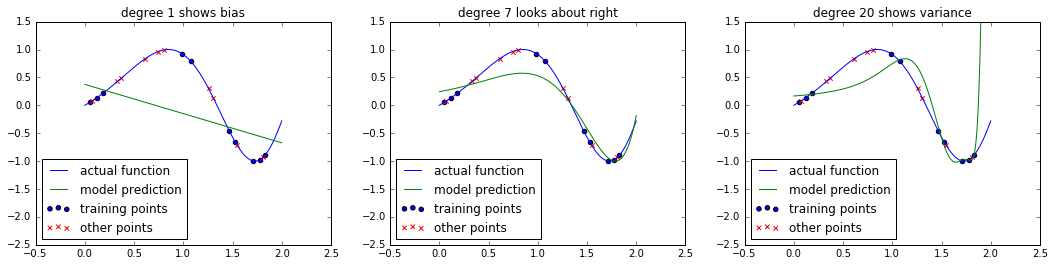

In [24]:
#Referenced http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    return np.sin(x+x**2)

x_plot = np.linspace(0, 2, 200)


x = np.linspace(0, 2, 200)
rng = np.random.RandomState(0)
rng.shuffle(x)
train_x = np.sort(x[:10])
other_x = np.sort(x[10:20])
y = f(train_x)
other_y = f(other_x)

X = train_x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

fig = plt.figure(figsize=(18,4))
subindex = 1
subtitle = ['degree 1 shows bias', 'degree 7 looks about right', 'degree 20 shows variance']

for degree in [1, 7, 20]:
    ax = plt.subplot(1, 3, subindex)
    ax.set_title(subtitle[subindex-1])
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    
    plt.plot(x_plot, f(x_plot), label="actual function")
    plt.scatter(train_x, y, label="training points")
    plt.scatter(other_x, other_y, label = "other points", marker = 'x', color = 'r')
    plt.plot(x_plot, y_plot, label="model prediction")
    
    plt.legend(loc='lower left', ncol=1)
    plt.ylim([-2.5,1.5])
    subindex += 1


[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HOWEWORK --------</h2></div></center>